In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
torch.manual_seed(3)

### Craeting Dataset :

Creating a dataset from x_train and y_train tensors using PyTorch's TensorDataset The x_train tensor contains input data, while the y_train tensor holds corresponding target values. This approach is commonly used to manage and manipulate data for machine learning tasks, making data handling and processing more organized and efficient.

In [4]:
x_train = torch.Tensor([[1], [2], [3]])
y_train = torch.Tensor([[4], [5], [6]])

print("x_train:", x_train)
print("y_train :", y_train)

x_train: tensor([[1.],
        [2.],
        [3.]])
y_train : tensor([[4.],
        [5.],
        [6.]])


x_train and y_train tensors are converted into Variables. And then visualizing the relationship between the input data and corresponding target values.

In [5]:
x, y = Variable(x_train), Variable(y_train)

In [6]:
x

tensor([[1.],
        [2.],
        [3.]])

In [7]:
y

tensor([[4.],
        [5.],
        [6.]])

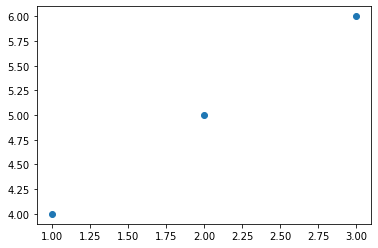

In [9]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [10]:
weight = Variable(torch.rand(1, 1))

In [11]:
weight

tensor([[0.0043]])

In [12]:
x.mm(weight)

tensor([[0.0043],
        [0.0085],
        [0.0128]])

In [13]:
model = nn.Linear(1, 1, bias = True)

print(model)

model.weight, model.bias

Linear(in_features=1, out_features=1, bias=True)


(Parameter containing:
 tensor([[-0.7889]], requires_grad=True),
 Parameter containing:
 tensor([-0.4283], requires_grad=True))

### Creating Loss Function :

Initializing mean squared error (MSE) loss function using nn.MSELoss() module for measuring the difference between predicted and target values.

In [16]:
loss_func = nn.MSELoss()
loss_func

MSELoss()

In [18]:
optimizer = torch.optim.SGD(model.parameters(), 
                            lr = 0.01)

In [20]:
model(x)

tensor([[-1.2172],
        [-2.0060],
        [-2.7949]], grad_fn=<AddmmBackward0>)

### Training Model :

In a loop of 300 steps, it predicts outputs using the model, calculates the cost (loss), performs backpropagation to compute gradients, updates the model's parameters using an optimizer, and visualizes the training progress. The scatter plot displays data points along with the evolving model's predictions. The process aims to minimize the cost by adjusting the model's weight and bias parameters. After training, interactive mode is turned off.

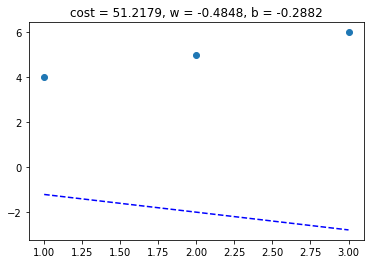

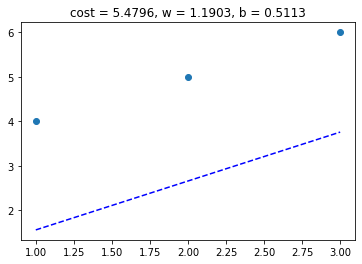

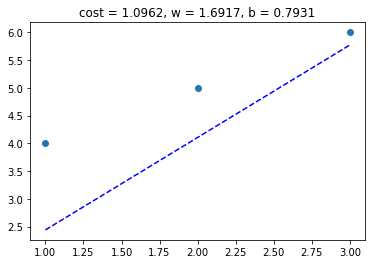

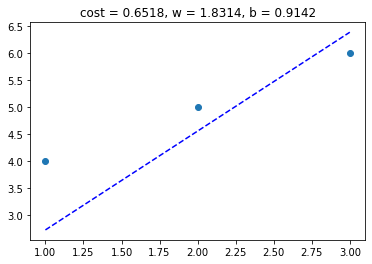

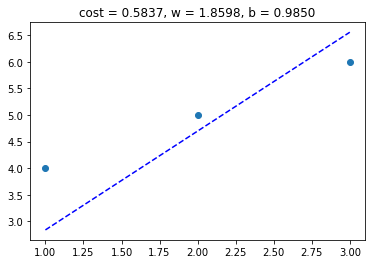

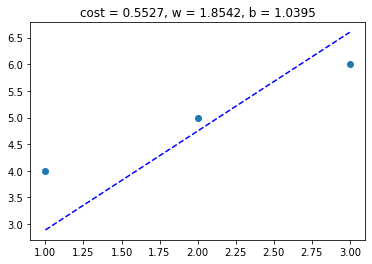

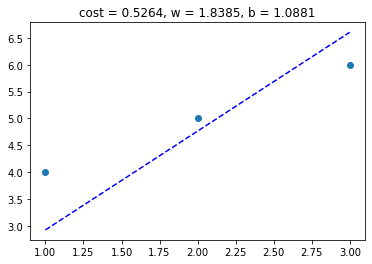

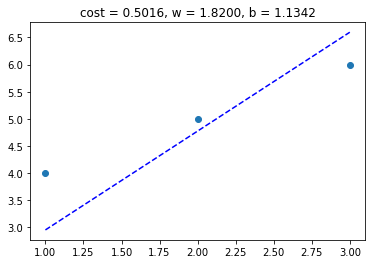

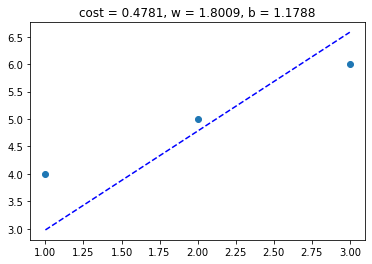

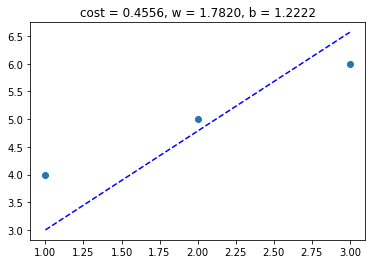

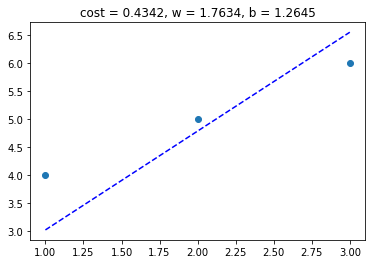

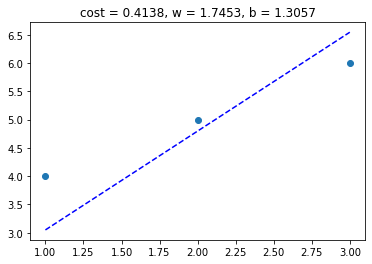

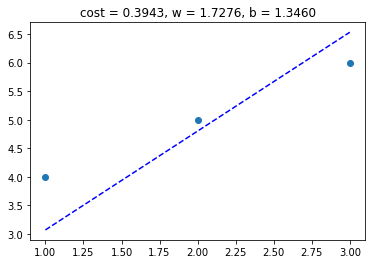

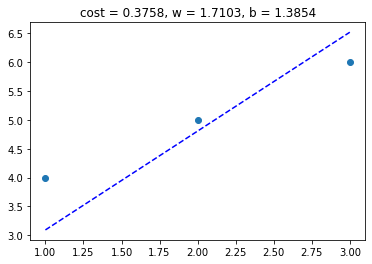

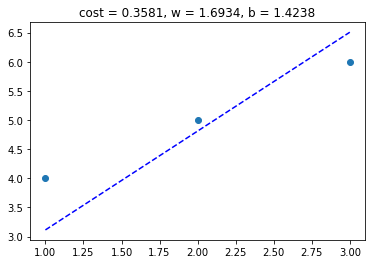

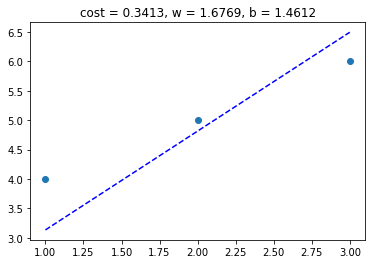

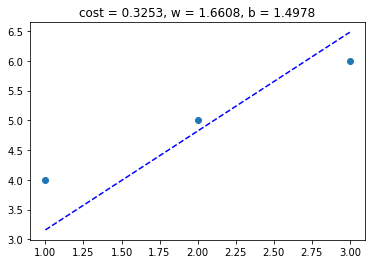

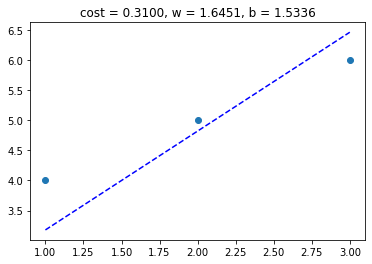

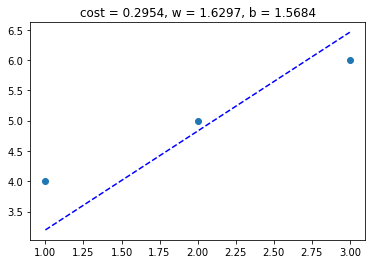

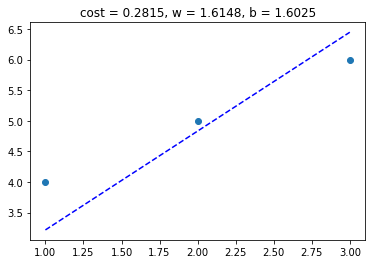

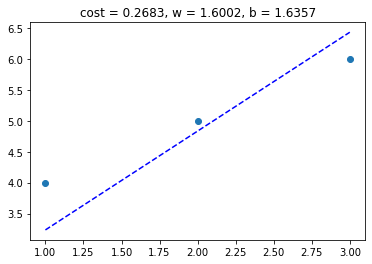

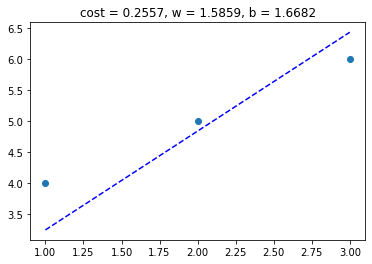

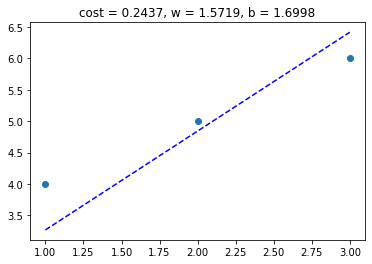

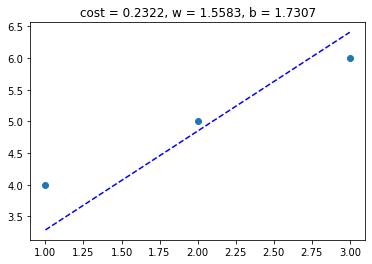

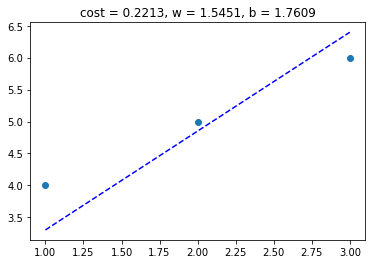

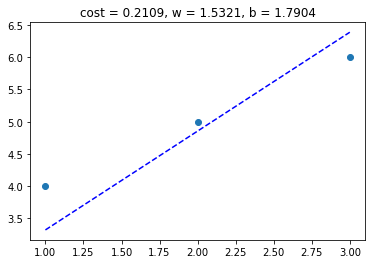

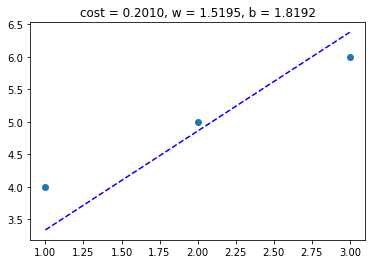

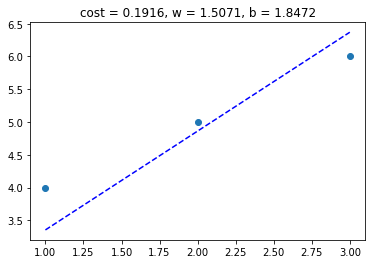

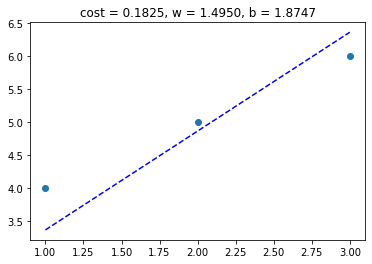

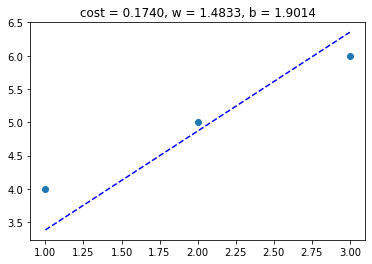

In [21]:
plt.ion()

for step in range(300):
    prediction = model(x)
    cost = loss_func(prediction, y)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'b--')
        plt.title('cost = %.4f, w = %.4f, b = %.4f' % (cost.data,model.weight.data[0][0],model.bias.data))
        plt.show()

plt.ioff()

In [22]:
x_test = Variable(torch.Tensor([[7]]))
y_test = model(x_test)

print('input : %.4f, output:%.4f' % (x_test.data[0][0], y_test.data[0][0]))

input : 7.0000, output:12.2353


In [23]:
model.weight, model.bias

(Parameter containing:
 tensor([[1.4729]], requires_grad=True),
 Parameter containing:
 tensor([1.9250], requires_grad=True))

Calculating costs for a range of weights and visualizes them as points on a scatter plot which helps understand how changes in weight affect the cost function.

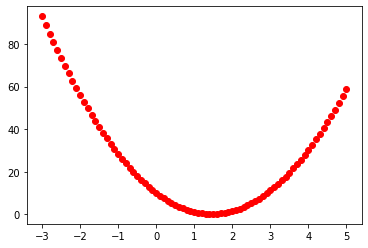

In [25]:
W_val, cost_val = [], []

for i in range(-30, 51):
    W = i * 0.1
    model.weight.data.fill_(W)
    cost =  loss_func(model(x),y)
    
    W_val.append(W)
    cost_val.append(cost.data)

plt.plot(W_val, cost_val, 'ro')
plt.show()